In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, make_moons, make_circles, make_classification

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Stacking

[sklearn.ensemble.StackingClassifier — scikit-learn 0.23.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

Note that estimators_ are fitted on the full X while final_estimator_ is trained using cross-validated predictions of the base estimators using cross_val_predict.

Parameters
1. estimators: list of (str, estimator):  Base estimators which will be stacked together. Each element of the list is defined as a tuple of string (i.e. name) and an estimator instance.
2. final_estimator estimator, default=None: A classifier which will be used to combine the base estimators. The default classifier is a LogisticRegression.
3. passthrough bool, default=False: When False, only the predictions of estimators will be used as training data for final_estimator. When True, the final_estimator is trained on the predictions as well as the original training data.





In [12]:
X, y = load_breast_cancer(return_X_y=True)

estimators = [
    ('GaussianNB', GaussianNB()),
    ('SVC_lin', SVC(kernel='linear', C=10)),
    ('SVC_rbf',SVC(kernel='rbf'))
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

for ename, emodel in estimators:
    print(ename, ': ', emodel.fit(X_train, y_train).score(X_test, y_test))

clf_ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear"), passthrough=False)
clf_ensemble_passthrough = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear"), passthrough=True)

print()
print('Stacking:', clf_ensemble.fit(X_train, y_train).score(X_test, y_test))
print('Stacking with passthrough:', clf_ensemble_passthrough.fit(X_train, y_train).score(X_test, y_test))

GaussianNB :  0.9370629370629371
SVC_lin :  0.951048951048951
SVC_rbf :  0.9230769230769231

Stacking: 0.958041958041958
Stacking with passthrough: 0.958041958041958


## Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [13]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

clf_bagging = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0).fit(X, y)
clf_bagging.predict([[0, 0, 0, 0]])

print('Bagging:', clf_bagging.fit(X_train, y_train).score(X_test, y_test))

Bagging: 0.88


## Boosting

sklearn.ensemble.AdaBoostClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

estimator object, default=None: The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

n_estimators int, default=50: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

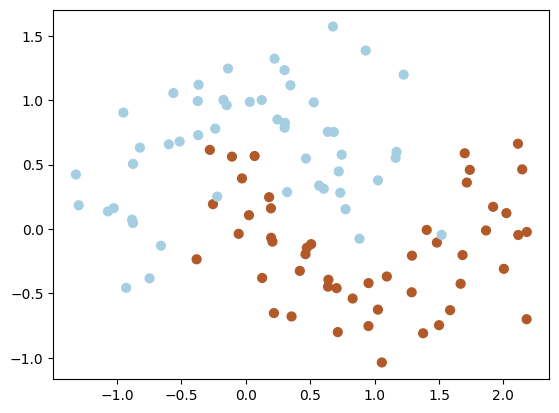

In [14]:
# generate and plot data
X, y = make_moons(noise=0.3, random_state=0)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)


plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Paired)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


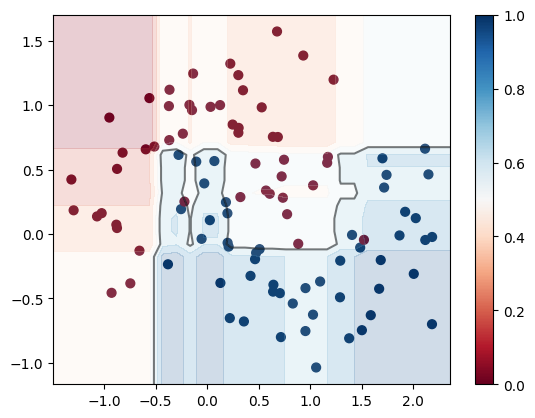

In [17]:
# fit AdaBoost with DecisionStump (1R)
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=50)

clf.fit(X,y)

# visualize data and prediction

cm = plt.cm.RdBu

# plot data points
scatter=plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=cm)


# plot decision boundary/maximum margin hyperplane and margins
#  (xlim, ylim, xx, yy... refer to the axes, not the input and output of the classifier)
# get axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#  create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# run classifier for all points in the mesh
Z = clf.decision_function(xy).reshape(XX.shape)

# plot prediction and decision boundary
ax.contourf(XX, YY, Z, cmap=cm,  alpha=0.2)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)

plt.colorbar()

plt.show()

In [16]:
clf.score(X,y)

1.0